# Calculating Gene expression. 

This script calculates gene expression in raw read counts, RPKM and TPM (So we are looking at the raw reads and a normalizsed measure of gene expression) using matched samples of RNA-seq and ribosome profiling data. 


Gene expression – or, more broadly, read density over from any high-throughput sequencing experiment over any genomic region – can be calculated easily in an interactive Python session.

Here I am caclulating read density over coding regions.

## Importing packages and defining the path

In [14]:
import copy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("ggplot")
from plastid import *
from plastid.plotting.plots import *

In [15]:
data_path = "/Users/keeganflanagan/Desktop/Khanh_position/Data/TE_tables/"

## Defining Functions

## Loading in the data

Open the read alignments, storing each dataset in a BAMGenomeArray:

In [16]:
df_offset = pd.read_csv(data_path + "dmel_control_2_te_table_offset.csv")
df_base = pd.read_csv(data_path + "dmel_control_2_te_table_base.csv") # This file needs to be changed so that it calls to the base file. 

## Comparing Pre and Post TE

In [17]:
df_combined = pd.merge(df_offset, df_base, how = "inner", on = "transcript_ID")

Oh you stupid little, these do not line up perfectly so of course if you just line them up all willy nilly they will not match. You are going to need to perform a merge first and then do the graph. That is a relief. 

In [18]:
df_combined

,transcript_ID,gene_ID_x,translation_efficiency_x,ribosome_profiling_tpm_x,RNA-seq_tpm_x,ribosome_profiling_counts_x,RNA-seq_counts_x,ribosome_profiling_rpkm_x,RNA-seq_rpkm_x,ribosome_profiling_rpk_x,...,gene_ID_y,translation_efficiency_y,ribosome_profiling_tpm_y,RNA-seq_tpm_y,ribosome_profiling_counts_y,RNA-seq_counts_y,ribosome_profiling_rpkm_y,RNA-seq_rpkm_y,ribosome_profiling_rpk_y,RNA-seq_rpk_y
0,FBtr0307049,CG43134,443.986628,15051.039000,33.899757,18838,4.000000,5047.062032,0.300990,58321.98142,...,CG43134,441.142249,14954.615258,33.899757,18929.207900,4.000000,5071.498380,0.300990,58604.358823,12.383901
1,FBtr0305282,CG43134,444.269452,11952.290940,26.903247,18850,4.000000,4007.959437,0.238869,46314.49631,...,CG43134,441.451629,11876.482352,26.903247,18942.483231,4.000000,4027.623577,0.238869,46541.727840,9.828010
2,FBtr0076572,Cp15,87.122557,5890.465480,67.611256,11755,12.720000,1975.248664,0.600309,22825.24272,...,Cp15,86.814589,5869.643419,67.611256,11846.051658,12.720000,1990.548508,0.600309,23002.042054,24.699029
3,FBtr0080521,Vm34Ca,173.437692,4821.825112,27.801483,9174,4.986667,1616.901694,0.246845,18684.31772,...,Vm34Ca,172.359125,4791.839349,27.801483,9220.159119,4.986667,1625.037159,0.246845,18778.328145,10.156144
4,FBtr0079239,Vm26Aa,283.421127,3631.069556,12.811570,9019,3.000000,1217.605860,0.113752,14070.20281,...,Vm26Aa,282.154298,3614.839482,12.811570,9080.331862,3.000000,1225.885940,0.113752,14165.884341,4.680187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30705,FBtr0346751,CG45770,NaN,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.00000,...,CG45770,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30706,FBtr0346752,Mst77Y-13,NaN,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.00000,...,Mst77Y-13,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30707,FBtr0346673,Pp1-Y2,NaN,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.00000,...,Pp1-Y2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30708,FBtr0346720,ORY,NaN,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.00000,...,ORY,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0, 0.5, 'Translation efficiency without offset')

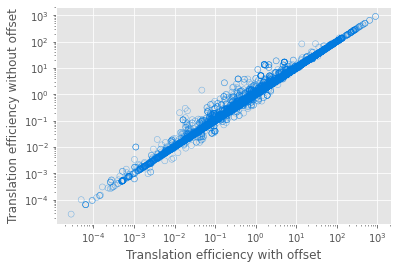

In [19]:
%matplotlib inline
my_figure = plt.figure()
plt.loglog() # log-scaling makes it easier to look at. 

# make a copy of dataframe for plotting
# this is because 0-values cannot be plotted in log space,
# We are going to set these values as nan so that they are not visible. 

MIN_VAL = np.nan
plot_df_combined = copy.deepcopy(df_combined)
plot_df_combined["translation_efficiency_x"].replace({0:MIN_VAL}, inplace=True)
plot_df_combined["translation_efficiency_y"].replace({0:MIN_VAL}, inplace=True)

# now, make a scatter plot
plt.scatter(plot_df_combined["translation_efficiency_x"],
            plot_df_combined["translation_efficiency_y"],
            marker="o",alpha=0.5,facecolor="none",edgecolor="#007ADF")
plt.xlabel("Translation efficiency with offset")
plt.ylabel("Translation efficiency without offset")